### Packages

In [1]:
import numpy as np
from hcipy import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

%matplotlib inline
# %matplotlib notebook

#Import functions
from Functions import *

In [2]:
os.chdir('Seeing')

## 3. Seeing

#### Compute again OTF and PSF fo the 2-telescopes interferometer, for different values of $\varphi_1$ & $\varphi_2$

Set the wavelength @1$\mu$m.\
Set the diameter of the mirrors $D = 1$m separated by a distance $B = 2-50D$.\
Set the focal length to $10$m.\
Set the rotation angle to $0$rad.\
Set the Fried parameter $r_0$ to $0.2$m.\
Set the exopsure time to $1$s.

In [3]:
wl = 1e-6 # m
D = 1 # m
B = 3*D # m
f = 10 # m
rot_angle = 0. # rad
r0 = 0.20 # m
time = 100 # ms

In [4]:
# Define the Position of the pupils
x = [B/2,-B/2]
y = [0.,0.]

#### For a short time (one snapshot $\iff \sim$  1 ms)

$\underline{\text{Interpretation:}}$

We have a phase induced by wind, temperature difference, or other atmospheric effects on the apertures.

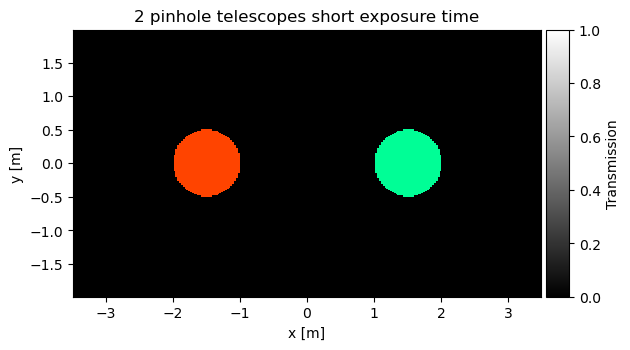

In [5]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x, y, D, seeing=True, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'2 pinhole telescopes short exposure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax=divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, label=r'Transmission', cax=cax)

plt.savefig('2_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

We can see that the vertical 'incoherent lines' are blurier than the no perturbation case.

$\underline{\text{Interpretation of OTF:}}$

I don't see any difference but it's probably because it's a small integration time

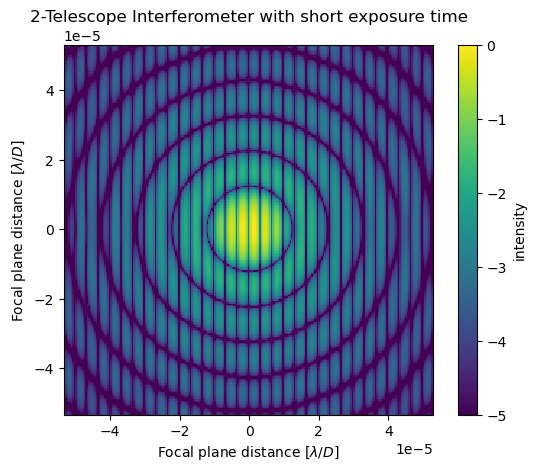

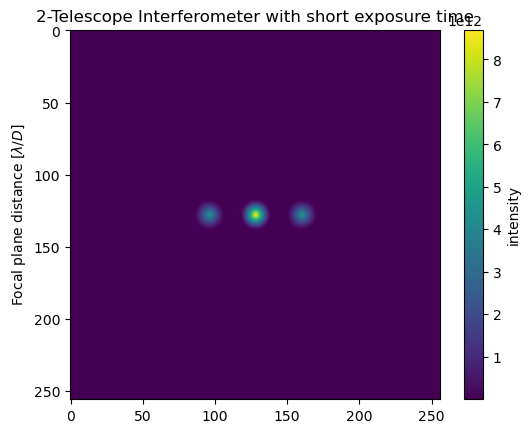

In [6]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'2-Telescope Interferometer with short exposure time')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('2_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'2-Telescope Interferometer with short exposure time')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('2_telescopes_interferometer_OTF.png')
plt.show()

#### For a long time (several snapshot $\iff \geq$  0.1 s $=$ 100 ms )

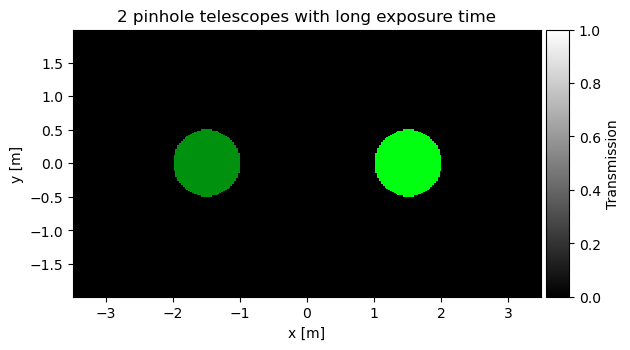

In [7]:
field=0. # Reset field
field, pupil_grid = Interferometer(x, y, D, seeing=True, exposure_time=time, shape="circular")

im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'2 pinhole telescopes with long exposure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax=divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, label=r'Transmission', cax=cax)

plt.savefig('2_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

The vertical 'incoherent lines' are now completely filled. 
It now looks like a single aperture telescope PSF (even though it's not) but blurier 

$\underline{\text{Interpretation of OTF:}}$

The OTF has less intensity on the side rings

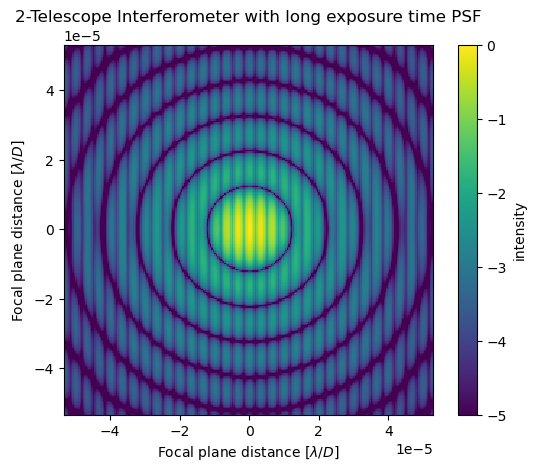

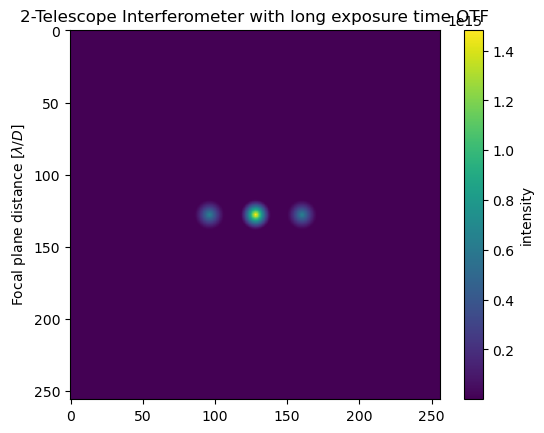

In [8]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'2-Telescope Interferometer with long exposure time PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('2_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'2-Telescope Interferometer with long exposure time OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('2_telescopes_interferometer_OTF.png')
plt.show()

### Ditto for the N-telescope studied previously
#### When middle ring of telescope is placed at 2D from the center

In [9]:
# Get the ploar coordinates of the interferometer and transform them in cartesian coordinates
tel_coord_polar = np.loadtxt('7TelescopesInterferometerCoord2D.dat')
print(tel_coord_polar)
x, y = pol2cart(tel_coord_polar[:,0],tel_coord_polar[:,1])

[[0.        0.       ]
 [2.        0.       ]
 [6.        0.       ]
 [2.        2.0943951]
 [6.        2.0943951]
 [2.        4.1887902]
 [6.        4.1887902]]


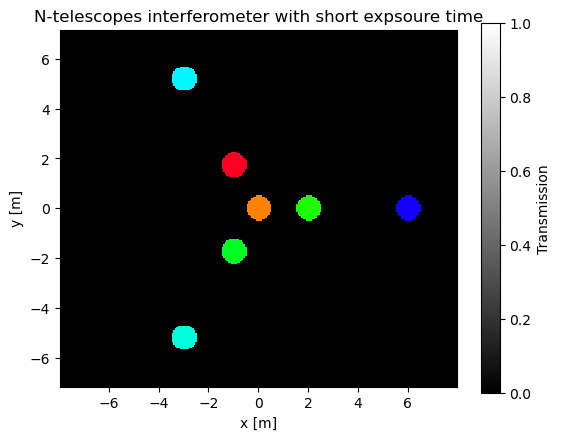

In [10]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,seeing=True, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with short expsoure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

It looks the same as the non-perturbated case but blurier

$\underline{\text{Interpretation of OTF:}}$

It looks the same as the non-perturbated case

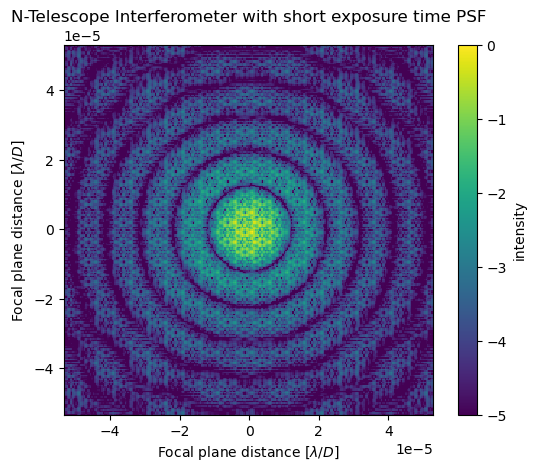

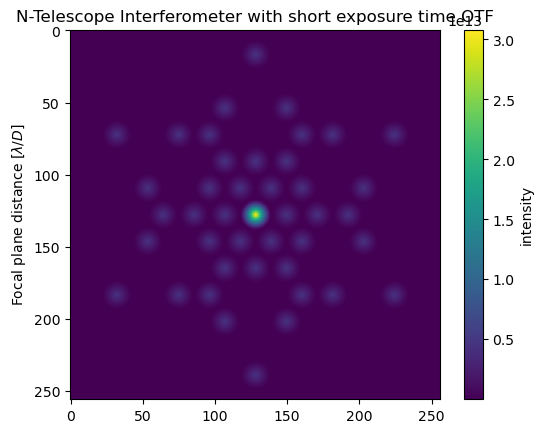

In [11]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'N-Telescope Interferometer with short exposure time PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'N-Telescope Interferometer with short exposure time OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### For a long time (several snapshot $\iff \geq$  0.1 s $=$ 100 ms )

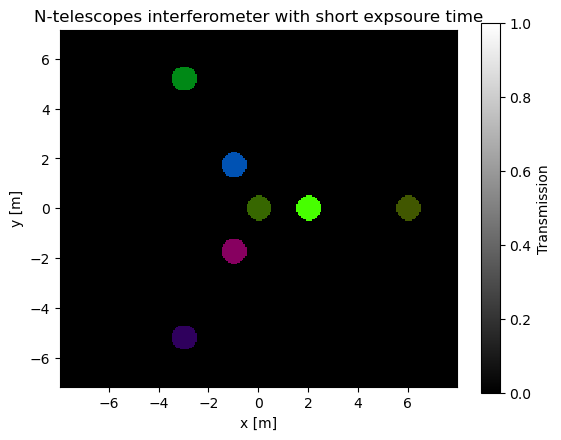

In [12]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,seeing=True, exposure_time=time, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with short expsoure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

It looks the same as the non-perturbated case but even blurrier

$\underline{\text{Interpretation of OTF:}}$

The shape is the same but the intensity is unequaly distributed

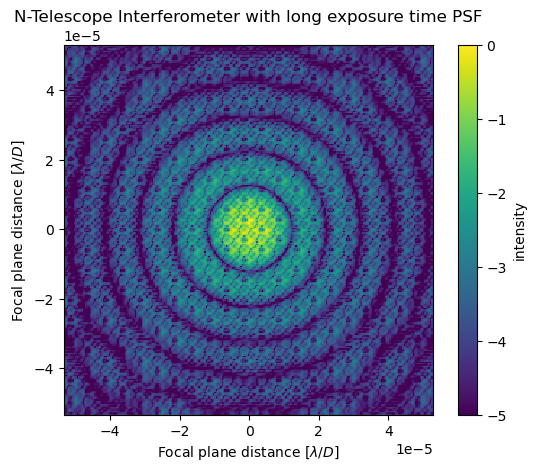

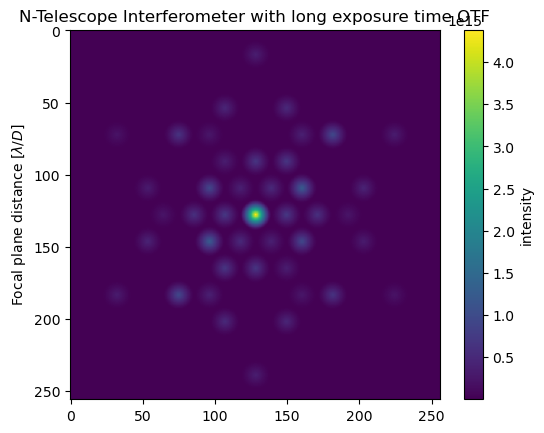

In [13]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'N-Telescope Interferometer with long exposure time PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'N-Telescope Interferometer with long exposure time OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### When middle ring of telescope is placed at 3D from the center

In [14]:
# Load the mirrors position for the middle ring at 2D (in polar coordinates)
tel_coord_polar = np.loadtxt('7TelescopesInterferometerCoord3D.dat')
tel_coord_polar
# Transform the polar coordinates into cartesian coordinates
x, y = pol2cart(tel_coord_polar[:,0],tel_coord_polar[:,1])

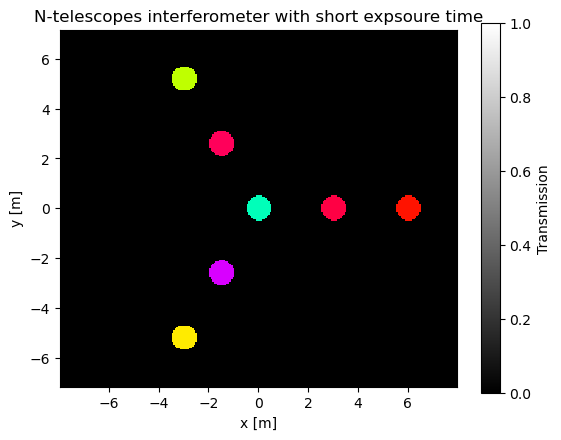

In [15]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,seeing=True, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with short expsoure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

Same as above

$\underline{\text{Interpretation of OTF:}}$

Same as above

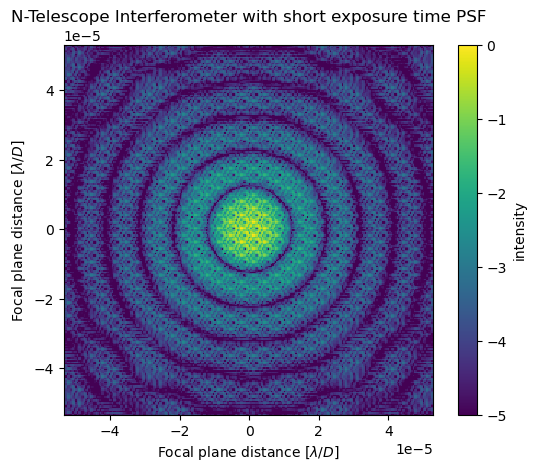

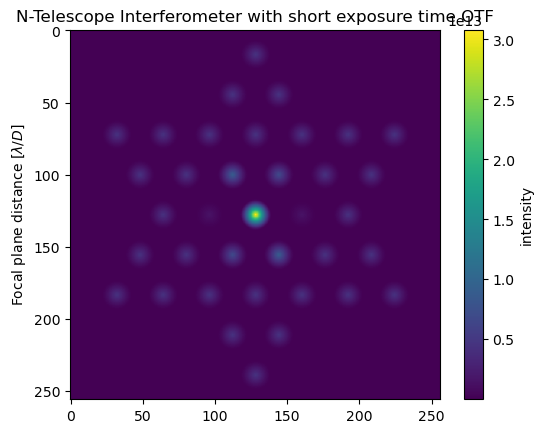

In [16]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'N-Telescope Interferometer with short exposure time PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'N-Telescope Interferometer with short exposure time OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

#### For a long time (several snapshot $\iff \geq$  0.1 s $=$ 100 ms )

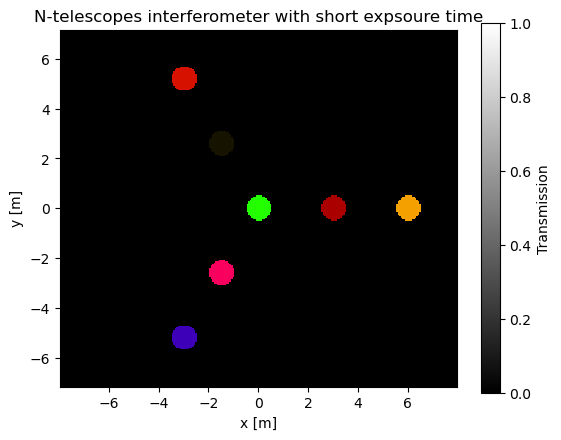

In [17]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,D,seeing=True, exposure_time=time, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'N-telescopes interferometer with short expsoure time')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('N_telescopes_interferometer.png')

$\underline{\text{Interpretation of PSF:}}$

Same as above

$\underline{\text{Interpretation of OTF:}}$

Same as above

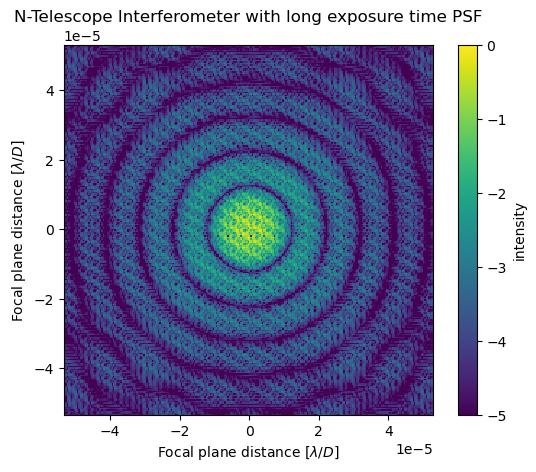

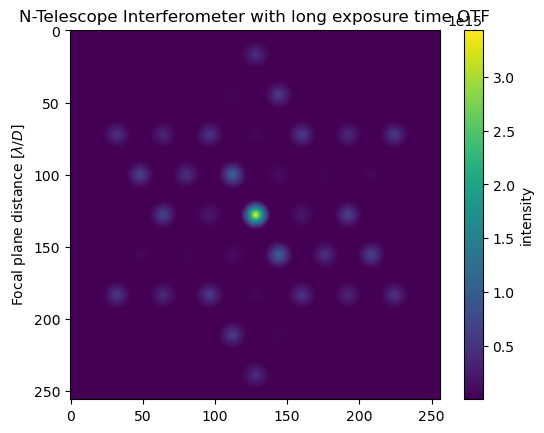

In [18]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'N-Telescope Interferometer with long exposure time PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'N-Telescope Interferometer with long exposure time OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('N_telescopes_interferometer_OTF.png')

## 3. Seeing: interpreting seeing-limited PSF

#### simulate instantaneous PSF and OTF of the telescope for various turbulence strength
#### Wavefront sensor with seeing

Set the wavelength @1$\mu$m.\
Set the diameter of the telescope $D = 1.4$m.\
Set the focal length to $10$m.\
Set the Fried parameter $r_0$ to $0.2$m.\
Set the wind speed to $5$m/s.
Set the exopsure time to $1$s.

In [19]:
wl = 1e-6 # m
D = 1.4 # m
f = 10 # m
r0 = 0.2 # m
d=D*1e2/r0
wind_speed = 5 # m/s
time = 1000 # ms
print('number of subapertures:', d)

number of subapertures: 700.0


In [20]:
# Load the mirrors position
tel_coord = np.loadtxt('WavefrontMirror.dat')
# correct the position by taking into account the size of the subapertures 
x = r0*tel_coord[:,0]
y = r0*tel_coord[:,1]

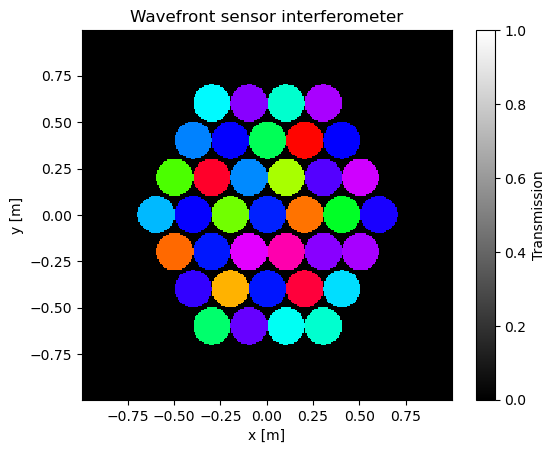

In [21]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,r0,seeing=True, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'Wavefront sensor interferometer')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('WFS.png')

$\underline{\text{Interpretation of PSF:}}$

There is no coherence on the PSF due the phase induced on each aperture, even though one can see that the highest is still more or less in the center and we see what remains of a first diffraction ring on the edge of the image.
The PSF is also very large compared to the previous PSFs because the seeing is bad.

$\underline{\text{Interpretation of OTF:}}$

The OTF gives the equivalent telescope size at a given wavelength.
The OTF being very small it implies that tubulences are reducing the equivalent telescope size

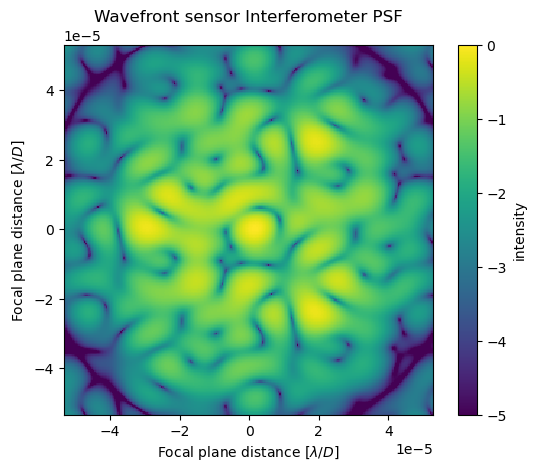

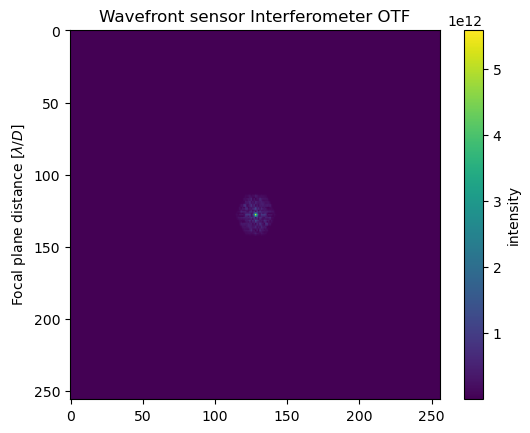

In [22]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'Wavefront sensor Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'Wavefront sensor Interferometer OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_OTF.png')

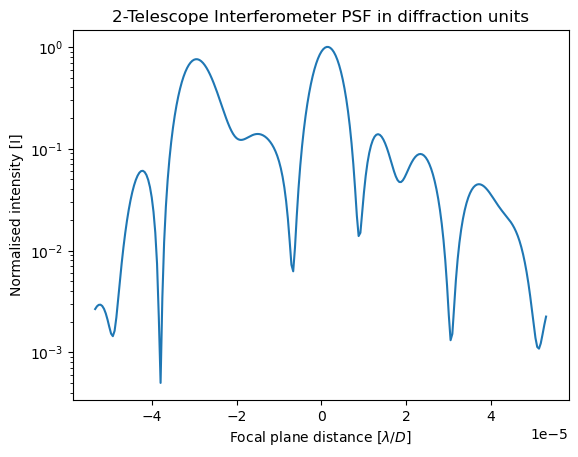

In [23]:
psf = focal_image.intensity
psf_shape = psf.grid.shape

slicefoc = psf.shaped[psf_shape[0] // 2, :]
slicefoc_normalised = slicefoc / psf.max()

# Plot a horizontal cut of the PSF
plt.plot(focal_grid.x.reshape(psf_shape)[0, :], slicefoc_normalised)
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Normalised intensity [I]')
plt.yscale('log')
plt.title(r'2-Telescope Interferometer PSF in diffraction units')

plt.savefig('2_telescopes_interferometer_PSF_diff_units.png')

#### Ditto for a long exposure PSF
#### Wavefront sensor with seeing and a long exposure time

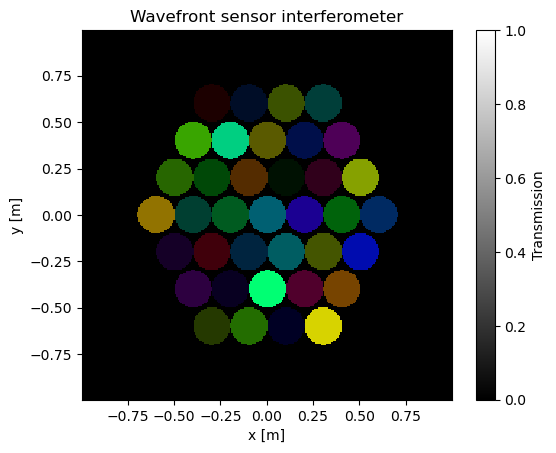

In [24]:
# Generate the field and the pupil
field, pupil_grid = Interferometer(x,y,r0,seeing=True, exposure_time=time, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'Wavefront sensor interferometer')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('WFS.png')

$\underline{\text{Interpretation of PSF:}}$

Same interpretation as before

$\underline{\text{Interpretation of OTF:}}$

Same as before but the intensity is even more concentrated in the center.

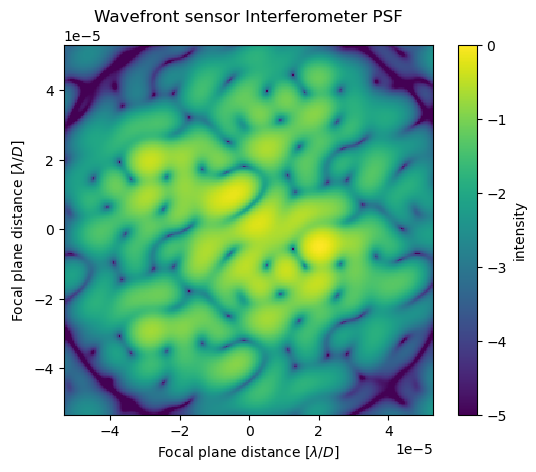

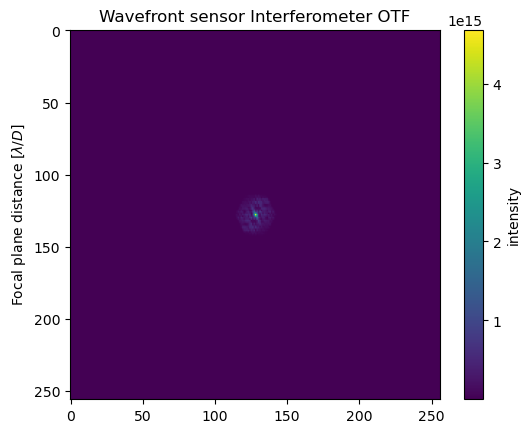

In [25]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'Wavefront sensor Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'Wavefront sensor Interferometer OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_OTF.png')

### Generate a temporally static phase screen and produce a turbulent PSF

#### Wavefront sensor with seeing with wind speed and a long exposure time
#### Wind speed of 5 m/s

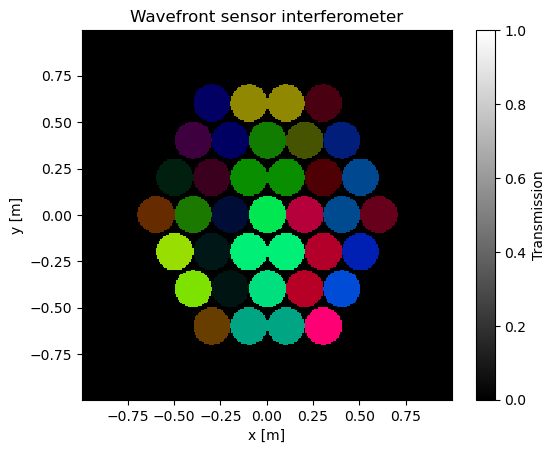

In [26]:
wind_speed = 5 # m/s
exposure_time = 200 # ms
r0 = 0.2 # m

# Generate the field and the pupil
field, pupil_grid = new_Interferometer(x,y,r0,seeing=True, exposure_time=time,
                                       wind_speed=wind_speed, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'Wavefront sensor interferometer')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('WFS.png')

$\underline{\text{Interpretation of PSF:}}$

We can see that we have a bit more coherence than before. 
It is because the turbulences are now more than a random phase on each aperture.
We now have a grid with a set phase and we make this grid move over the telescope.

$\underline{\text{Interpretation of OTF:}}$

Same as before

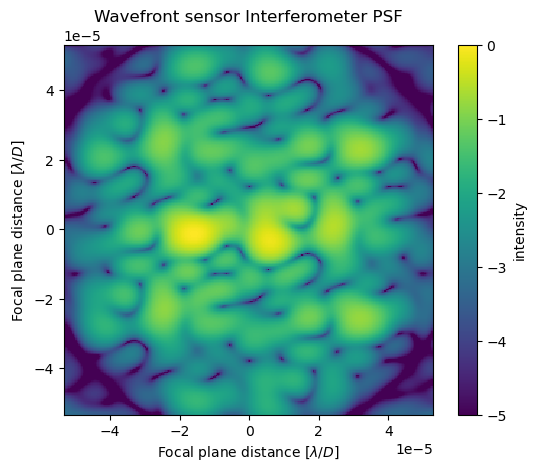

In [27]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'Wavefront sensor Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_PSF.png')
plt.show()

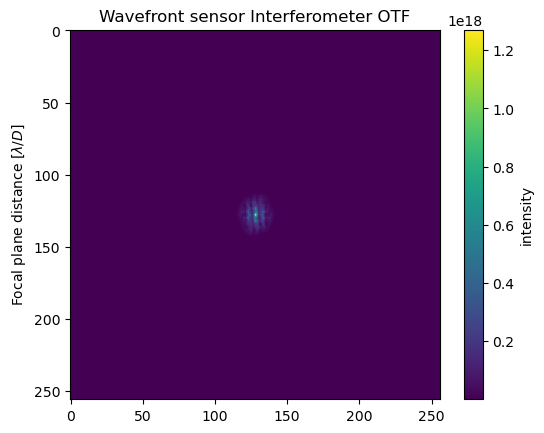

In [28]:
# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'Wavefront sensor Interferometer OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_OTF.png')

#### Wavefront sensor with seeing with wind speed and a long exposure time
#### Wind speed of 20 m/s

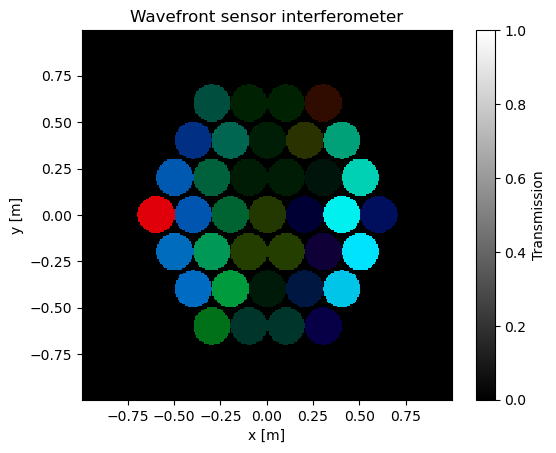

In [29]:
wind_speed = 20 # m/s
exposure_time = 200 # ms

# Generate the field and the pupil
field, pupil_grid = new_Interferometer(x,y,r0,seeing=True, exposure_time=time, 
                                       wind_speed=wind_speed, shape="circular")

# Plot the field of the interferometer
im = imshow_field(field, grid=pupil_grid, cmap='gray')
plt.title(r'Wavefront sensor interferometer')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.colorbar(label=r'Transmission')
plt.savefig('WFS_PSF.png')

$\underline{\text{Interpretation of PSF:}}$

same as before

$\underline{\text{Interpretation of OTF:}}$

same as before

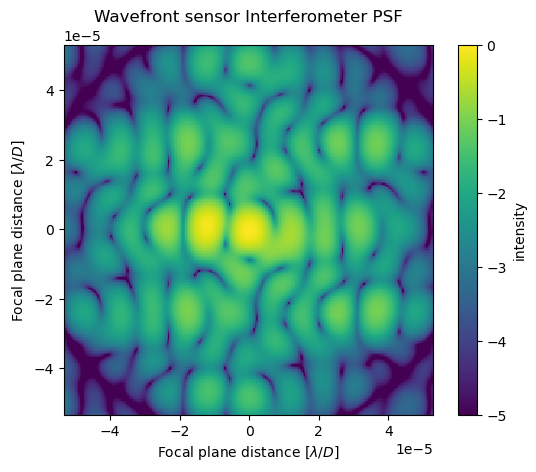

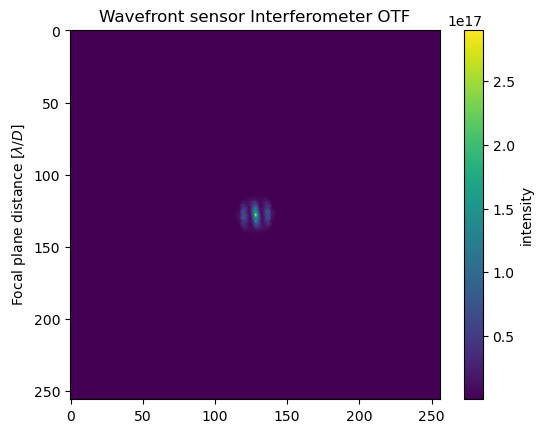

In [30]:
# Get the PSF
focal_image, focal_grid = Get_PSF(field, wl, f, B)
# Plot the PSF
imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.title(r'Wavefront sensor Interferometer PSF')
plt.xlabel(r'Focal plane distance [$\lambda/D$]')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_PSF.png')
plt.show()

# Get the real part of the OTF
real_otf = Get_OTF(focal_image)
# Plot the OTF
plt.imshow(real_otf)
plt.title(r'Wavefront sensor Interferometer OTF')
plt.ylabel(r'Focal plane distance [$\lambda/D$]')
plt.colorbar(label=r'intensity')
plt.savefig('WFS_OTF.png')
plt.show()

#### Wavefront sensor with seeing with wind speed and a short exposure time
#### Wind speed of 20 m/s 

In [31]:
# wind_speed = 20 # m/s
# exposure_time = 1 # ms

# # Generate the field and the pupil
# field, pupil_grid = new_Interferometer(x,y,r0,seeing=True, exposure_time=time, wind_speed=wind_speed)

# # Plot the field of the interferometer
# im = imshow_field(field, grid=pupil_grid, cmap='gray')
# plt.title(r'Wavefront sensor interferometer')
# plt.xlabel(r'x [m]')
# plt.ylabel(r'y [m]')
# plt.colorbar(label=r'Transmission')
# plt.savefig('WFS_PSF.png')

$\underline{\text{Interpretation of PSF:}}$



$\underline{\text{Interpretation of OTF:}}$



In [32]:
# # Get the PSF
# focal_image, focal_grid = Get_PSF(field, wl, f, B)
# # Plot the PSF
# imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
# plt.title(r'Wavefront sensor Interferometer PSF')
# plt.xlabel(r'Focal plane distance [$\lambda/D$]')
# plt.ylabel(r'Focal plane distance [$\lambda/D$]')
# plt.colorbar(label=r'test')
# plt.savefig('WFS_PSF.png')
# plt.show()            

# # Get the real part of the OTF
# real_otf = Get_OTF(focal_image)
# # Plot the OTF
# plt.imshow(real_otf)
# plt.title(r'Wavefront sensor Interferometer OTF')
# plt.ylabel(r'Focal plane distance [$\lambda/D$]')
# plt.colorbar(label=r'test')
# plt.savefig('WFS_OTF.png')

In [33]:
from colorsys import hls_to_rgb

def colorize(z):
    n,m = z.shape
    c = np.zeros((n,m,3))
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)

    idx = ~(np.isinf(z) + np.isnan(z))
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    B = 1.0 - 1.0/(1.0+abs(z[idx])**0.3)
    c[idx] = [hls_to_rgb(a, b, 0.8) for a,b in zip(A,B)]
    return c

In [34]:
wind_speed = 20 # m/s
exposure_time = 200 # ms
r0 = 0.2 # m
seeing=True
exposure_time=time
wind_speed=wind_speed
shape="rectangular"

# convert wind speed [m/s] in [m/ms]
wind_speed *= 1e-3  

field=0.
pupil_grid = make_pupil_grid(256,[2*(max(x)+2*D),2*(max(y)+2*D)])

yaxis = exposure_time*7
#     array = np.random.rand(7,yaxis)
array = np.random.uniform(low=0., high=2*np.pi, size=(7, yaxis))
exp_array = np.vectorize(exp)
turbulence = exp_array(array)

# plt.figure(figsize=(20,2))
# plt.imshow(colorize(turbulence), interpolation='nearest', extent=(0,20,0,7))

# anim = FFMpegWriter('WFS_stack.mp4', framerate=60)
# piston_telescope_pupil = 0.

# for t in range (0,exposure_time,1): 

# #     field = 0.0
# #     piston_telescope_pupil = 0.
    
#     for i in range(len(x)):
#         if shape == "circular":
#             telescope_pupil_generator = make_rotated_aperture(make_circular_aperture(D,(x[i],y[i])), rot_angle)
#         elif shape == "rectangular":
#             telescope_pupil_generator = make_rotated_aperture(make_rectangular_aperture(D,(x[i],y[i])), rot_angle)
#         else:
#             print("Error the shape given should be \"circular\" or \"rectangular\".")

#         telescope_pupil = telescope_pupil_generator(pupil_grid)

#         piston_telescope_pupil += turbulence[int( x[i]/D ), int( y[i]/D + (wind_speed*t) )] * telescope_pupil

#         field += piston_telescope_pupil
        
#     focal_image, focal_grid = Get_PSF(field, wl, f, B)
#     # Plot the PSF
#     imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
#     plt.title(r'Wavefront sensor Interferometer PSF')
#     plt.xlabel(r'Focal plane distance [$\lambda/D$]')
#     plt.ylabel(r'Focal plane distance [$\lambda/D$]')
#     plt.colorbar(label=r'intensity')

#     anim.add_frame()
#     plt.close()

# anim.close()